## This note_book is all about computer vision
Types of computervison mostly can be fit into 4 boxes
**binary Classification**
**multi-class Classification**
**Object detection**
**panoptic Segmentation**

## What we're going to cover

We're going to apply the PyTorch Workflow we've been learning in the past couple of sections to computer vision.

![a PyTorch workflow with a computer vision focus](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-pytorch-computer-vision-workflow.png)

Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| **0. Computer vision libraries in PyTorch** | PyTorch has a bunch of built-in helpful computer vision libraries, let's check them out.  |
| **1. Load data** | To practice computer vision, we'll start with some images of different pieces of clothing from [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). |
| **2. Prepare data** | We've got some images, let's load them in with a [PyTorch `DataLoader`](https://pytorch.org/docs/stable/data.html) so we can use them with our training loop. |
| **3. Model 0: Building a baseline model** | Here we'll create a multi-class classification model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop**. | 
| **4. Making predictions and evaluating model 0** | Let's make some predictions with our baseline model and evaluate them. |
| **5. Setup device agnostic code for future models** | It's best practice to write device-agnostic code, so let's set it up. |
| **6. Model 1: Adding non-linearity** | Experimenting is a large part of machine learning, let's try and improve upon our baseline model by adding non-linear layers. |
| **7. Model 2: Convolutional Neural Network (CNN)** | Time to get computer vision specific and introduce the powerful convolutional neural network architecture. |
| **8. Comparing our models** | We've built three different models, let's compare them. |
| **9. Evaluating our best model** | Let's make some predictions on random images and evaluate our best model. |
| **10. Making a confusion matrix** | A confusion matrix is a great way to evaluate a classification model, let's see how we can make one. |
| **11. Saving and loading the best performing model** | Since we might want to use our model for later, let's save it and make sure it loads back in correctly. |

In [12]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.7.1
torchvision version: 0.22.1


In [13]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu") #setting up our device to mps
device


device(type='mps')

## building the model with non-linearity for the image classification task
* first we need to flatten the tensor channels [color channel , height , width] -> [color channel , height * width]
* next we can do linear transformation with the flattened tensor along with activation function which is going to be Relu  

In [14]:
## getting the Fashion MNIST dataset
train_data = datasets.FashionMNIST(
    root = 'data',
    train =True,
    download =True,
    transform = ToTensor(),  # Convert the images to PyTorch tensors while loading the data it self
    target_transform= None # No transformation on the labels needed

)
test_data = datasets.FashionMNIST(
    root= 'data',
    train = False,
    download = True,
    transform = ToTensor()  # Convert the images to PyTorch tensors while loading the data itself
    # target_transform= None # No transformation on the labels needed
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 259kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 4.87MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.13MB/s]


In [15]:
image , label = train_data[0]
image ,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [17]:
image.shape 

torch.Size([1, 28, 28])

as we can see that a 1 ->color channel(gery scale) with 28 X 28 dimensions

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [19]:
classes = train_data.classes
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

so our problem goes like this 

i/p(image) -> neural net computaion -> o/p(has to classify correctly b/w 10 classes)

Text(0.5, 1.0, 'Sandal')

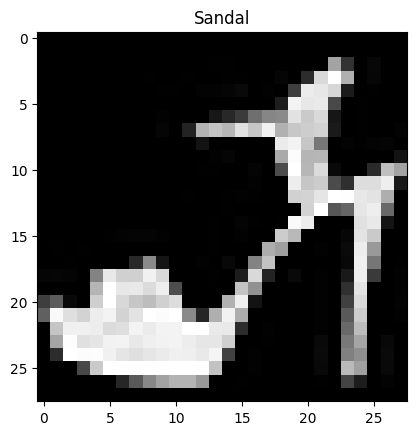

In [26]:
import matplotlib.pyplot as plt
image , label = train_data[9]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(classes[label])

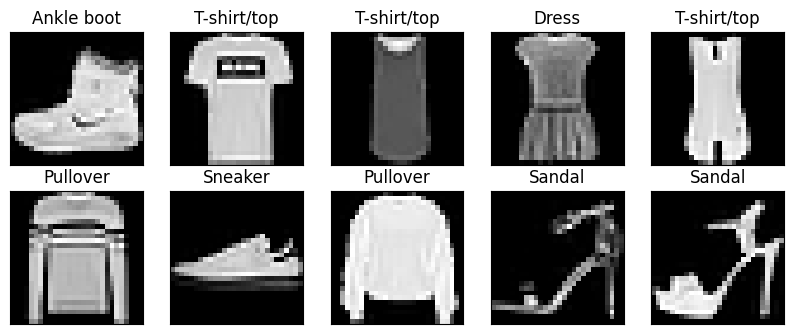

In [25]:
## printing first 10 images in gery scale with the lables
fig = plt.figure(figsize=(10, 10))
for i in range(10):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    image, label = train_data[i]
    ax.imshow(image.squeeze(), cmap="gray")
    ax.set_title(classes[label])

## Preparing the data set

why do we need to prepare the data set wouldnt it be ideal to train the whole data set for every epoch ?

correct and incorrect their might be some bebifits to trainning the whole dataset at evry epoch the thing we need to keep in mind is 

machine learning is always computational game the compute cost going to sky rocket if train the model on whole data set at every epoch

by traing them in batch we we give our model more opertunintes to improve why (beacuse we perform gradient decent at evry bacth compared to every epoch)

mini-batch size can vary 32,64,128....

in pytorch the easiest way to do that is `torch.utils.data.DataLoader`

In [27]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)# taking train data chunks of 64 with random shuffling
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False) # taking test data chunks of 64 without random shuffling

print(f'DataLoader :{train_dataloader , test_dataloader} ')
print(f"length of train_dataloader: {len(train_dataloader)} batches of 64 images each")
print(f"length of test_dataloader: {len(test_dataloader)} batches of 64 images each")

DataLoader :(<torch.utils.data.dataloader.DataLoader object at 0x143c635e0>, <torch.utils.data.dataloader.DataLoader object at 0x143c61bd0>) 
length of train_dataloader: 938 batches of 64 images each
length of test_dataloader: 157 batches of 64 images each


so in total we do gradient decent 938 time while training our data

In [28]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(f"train_features_batch shape: {train_features_batch.shape}")
print(f"train_labels_batch shape: {train_labels_batch.shape}")

train_features_batch shape: torch.Size([64, 1, 28, 28])
train_labels_batch shape: torch.Size([64])


In [31]:
## model building with mps
class imagemodel0(nn.Module):
    def __init__(self , input_shape , hidden_units , output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flattening the tenstor 
            nn.Linear(input_shape, hidden_units), # input layer
            nn.ReLU(),
            nn.Linear(hidden_units, output_shape), # output layer
            nn.ReLU()
        )
    def forward(self, x):
        return self.layer_stack(x)

In [33]:
# model instantiation
model0= imagemodel0(
    784,10,10
).to(device) # 784 is the input shape, 10 is the hidden units and 10 is the output shape
model0

imagemodel0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [34]:
next(model0.parameters()).device # check model device

device(type='mps', index=0)

## setting up our metrics
* accuracy
* loss
* optimizer

In [37]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model0.parameters(), 
                            lr=0.1)

## functionizing the training and testing loops
* things to keep an eye on make sure to calls .to(device)
* for training loop we use train data loader
* for testing loop we use test data loader

In [38]:
def train_step(
    model: nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: nn.Module,
    optimizer: torch.optim.Optimizer,
    accuracy_fn,
    device: torch.device = device
):
    'this dunction trains the model'
    train_loss , train_acc =0,0
    model.to(device)
    for batch,(X,y) in enumerate(data_loader):
        X ,y = X.to(device), y.to(device) # move data to device
        model.train() # set model to training mode
        y_pred = model(X)# one forward pass
        loss = loss_fn(y_pred, y) # calculate loss
        acc =accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # calculate accuracy
        train_loss += loss.item() # accumulate loss
        train_acc += acc # accumulate accuracy
        optimizer.zero_grad() # zero the gradients
        loss.backward() # backpropagation
        optimizer.step() # update the weights
    train_loss /= len(data_loader) # average loss
    train_acc /= len(data_loader) # average accuracy
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")
    return train_loss, train_acc

In [39]:
def test_step(
    model: nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: nn.Module,
    accuracy_fn,
    device: torch.device = device
):
    'this function tests the model'
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # set model to evaluation mode
    with torch.inference_mode(): # no gradients needed
        for batch, (X, y) in enumerate(data_loader):
            X, y = X.to(device), y.to(device) # move data to device
            y_pred = model(X) # one forward pass
            loss = loss_fn(y_pred, y)
            acc = accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) #
            test_loss += loss.item()
            test_acc += acc
    test_loss /= len(data_loader) # average loss
    test_acc /= len(data_loader) # average accuracy
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")
    

### we are done with the trainig step and testing step now we will loops trough the epoch and call these steps at each epoch 

In [40]:
epochs = 10
for epoch in range(epochs):
    print(f"Epoch:{epoch} of {epochs}")
    train_step(model=model0,
               data_loader = train_dataloader,
               loss_fn = loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn,
               device = device)
    test_step(model=model0,
                data_loader = test_dataloader,
                loss_fn = loss_fn,
                accuracy_fn = accuracy_fn,
                device = device)
    

Epoch:0 of 10
Train loss: 1.36699 | Train acc: 55.77%
Test loss: 1.25295 | Test acc: 59.73%
Epoch:1 of 10
Train loss: 1.20383 | Train acc: 61.69%
Test loss: 1.25370 | Test acc: 60.43%
Epoch:2 of 10
Train loss: 1.14303 | Train acc: 62.79%
Test loss: 1.07622 | Test acc: 63.17%
Epoch:3 of 10
Train loss: 1.02361 | Train acc: 64.10%
Test loss: 1.06233 | Test acc: 62.35%
Epoch:4 of 10
Train loss: 1.00983 | Train acc: 64.31%
Test loss: 1.03003 | Test acc: 63.91%
Epoch:5 of 10
Train loss: 0.99948 | Train acc: 64.47%
Test loss: 1.02404 | Test acc: 64.39%
Epoch:6 of 10
Train loss: 0.99283 | Train acc: 64.62%
Test loss: 1.04632 | Test acc: 63.72%
Epoch:7 of 10
Train loss: 0.98821 | Train acc: 64.72%
Test loss: 1.01729 | Test acc: 64.62%
Epoch:8 of 10
Train loss: 0.98259 | Train acc: 64.83%
Test loss: 1.03732 | Test acc: 64.48%
Epoch:9 of 10
Train loss: 0.97802 | Train acc: 64.87%
Test loss: 1.05742 | Test acc: 63.29%


* 64.87 train and 63.29 test accuracy is okish what can we do to chnage 
* we can change the batch size 32 or 128 
* change the model parameter add more hidder layer transformation 

In [ ]:
# def eval_model(model: torch.nn.Module, 
#                data_loader: torch.utils.data.DataLoader, 
#                loss_fn: torch.nn.Module, 
#                accuracy_fn):

#     loss, acc = 0, 0
#     model.eval()
#     with torch.inference_mode():
#         for X, y in data_loader:
#             # Make predictions with the model
#             y_pred = model(X)
            
#             # Accumulate the loss and accuracy values per batch
#             loss += loss_fn(y_pred, y)
#             acc += accuracy_fn(y_true=y, 
#                                 y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
#         # Scale loss and acc to find the average loss/acc per batch
#         loss /= len(data_loader)
#         acc /= len(data_loader)
        
#     return {"model_name": model.__class__.__name__, # only works when model was created with a class
#             "model_loss": loss.item(),
#             "model_acc": acc}



In [42]:
model0_finalresults = eval_model(model=model0,
                    data_loader=test_dataloader,
                    loss_fn=loss_fn,
                    accuracy_fn=accuracy_fn)
model0_finalresults

RuntimeError: Tensor for argument input is on cpu but expected on mps

It looks like our `eval_model()` function errors out with:

> `RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)`

It's because we've setup our data and model to use device-agnostic code but not our evaluation function.

How about we fix that by passing a target `device` parameter to our `eval_model()` function?

Then we'll try calculating the results again.

In [43]:
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}



In [44]:
model0_finalresults = eval_model(model=model0,
                    data_loader=test_dataloader,
                    loss_fn=loss_fn,
                    accuracy_fn=accuracy_fn)
model0_finalresults

{'model_name': 'imagemodel0',
 'model_loss': 1.0574243068695068,
 'model_acc': 63.28622611464968}

## this is great visuval resouce for the convolution neural net
>https://poloclub.github.io/cnn-explainer/
> playing with this resouce arcitexture

In [49]:
## creating the CNN model tiny-vgg architecture
class model1(nn.Module):
    def __init__(self,input_shape , hidden_units , output_shape):
        super().__init__()
        self.cnn_block_1 =nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels = hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1), # 28x28x1 -> 28x28x10
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1), # 28x28x10 -> 28x28x10
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) # 28x28x10 -> 14x14x10
        )
        self.cnn_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units,hidden_units,3,1), # 14x14x10 -> 12x12x10
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, 1), # 12x12x10 -> 10x10x10
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) # 10x10x10 -> 5x5x10
            
        )
        self.classfier = nn.Sequential(
            nn.Flatten(),# flattenning the tensor 5x5x10 -> 250
            nn.Linear(hidden_units *5 * 5, output_shape), # 250 -> 10

        )
    def forward(self, x):
        x= self.cnn_block_1(x)
        x = self.cnn_block_2(x)
        x = self.classfier(x)
        return x

In [50]:
#model instantiation
model1= model1(
    1,10,10
).to(device) # 1 is the input shape, 10 is the hidden units and 10 is the output shape
model1

model1(
  (cnn_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cnn_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classfier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=250, out_features=10, bias=True)
  )
)

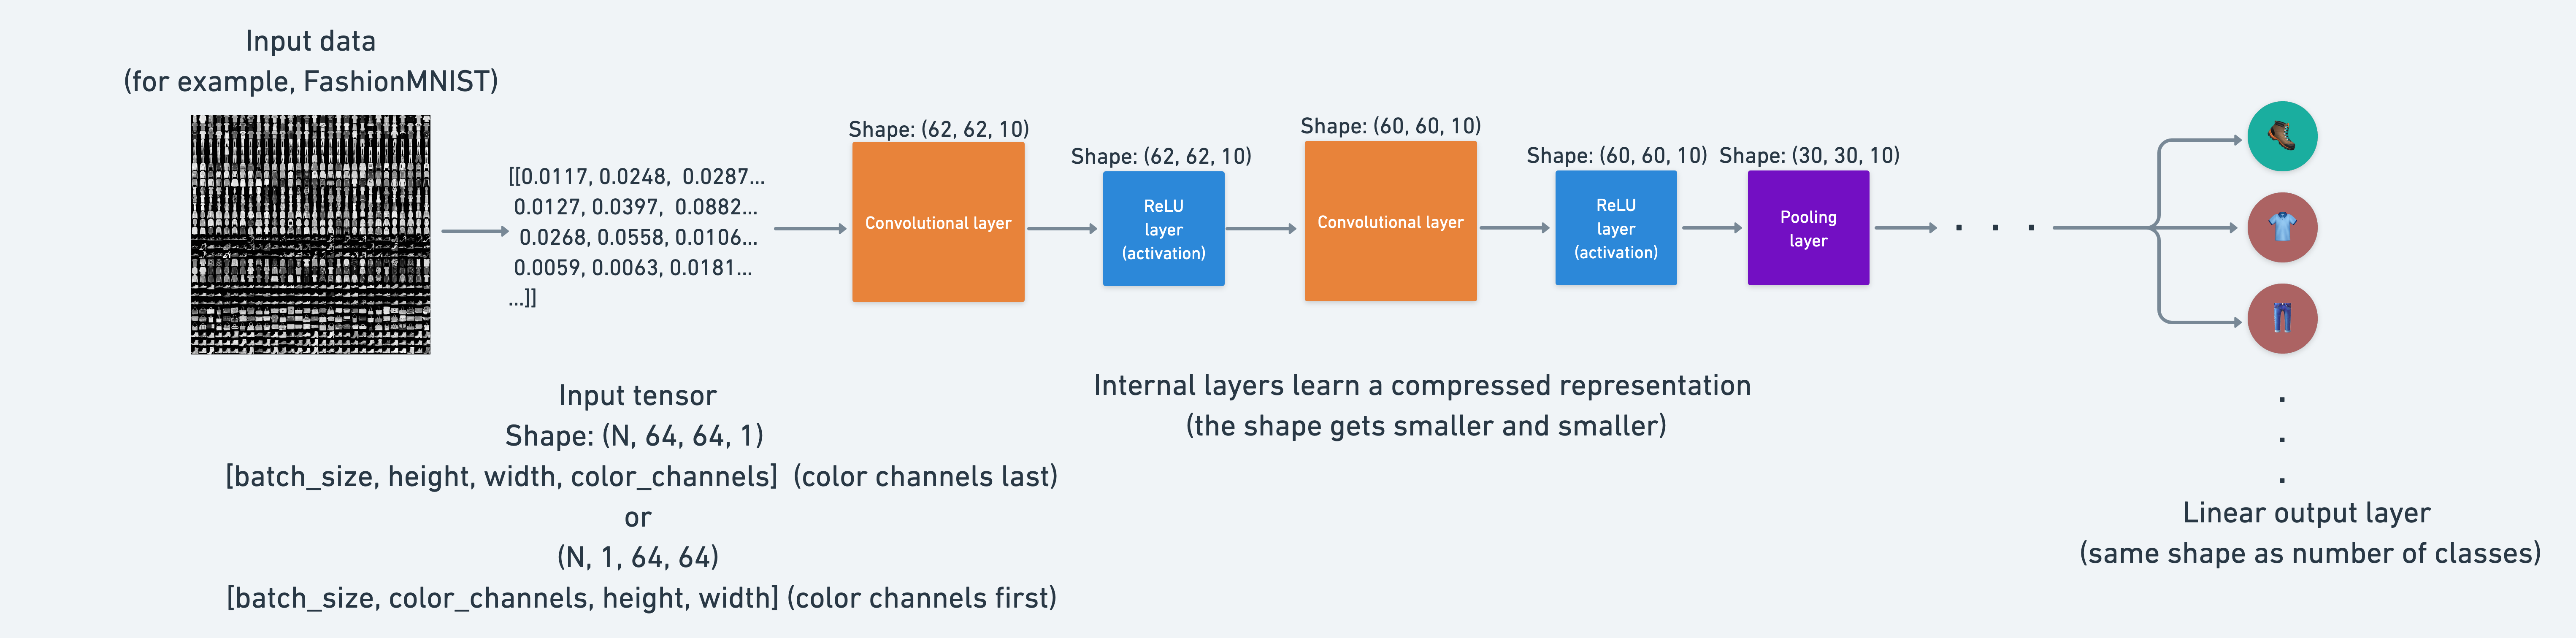

In [51]:
# setting up our loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model1.parameters(),
                            lr=0.1)


In [52]:
# traing our tinyvgg model
epochs =10
for epoch in range(epochs):
    print(f"Epoch:{epoch} of {epochs}")
    train_step(model=model1,
               data_loader = train_dataloader,
               loss_fn = loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn,
               device = device)
    test_step(model=model1,
                data_loader = test_dataloader,
                loss_fn = loss_fn,
                accuracy_fn = accuracy_fn,
                device = device)

Epoch:0 of 10
Train loss: 0.80404 | Train acc: 71.19%
Test loss: 0.60104 | Test acc: 78.11%
Epoch:1 of 10
Train loss: 0.45679 | Train acc: 83.45%
Test loss: 0.45656 | Test acc: 83.91%
Epoch:2 of 10
Train loss: 0.41252 | Train acc: 85.07%
Test loss: 0.48546 | Test acc: 82.95%
Epoch:3 of 10
Train loss: 0.38385 | Train acc: 86.12%
Test loss: 0.40969 | Test acc: 85.37%
Epoch:4 of 10
Train loss: 0.36556 | Train acc: 86.95%
Test loss: 0.39403 | Test acc: 85.43%
Epoch:5 of 10
Train loss: 0.34917 | Train acc: 87.37%
Test loss: 0.39312 | Test acc: 85.00%
Epoch:6 of 10
Train loss: 0.33776 | Train acc: 87.95%
Test loss: 0.38266 | Test acc: 86.63%
Epoch:7 of 10
Train loss: 0.32968 | Train acc: 88.11%
Test loss: 0.35753 | Test acc: 87.21%
Epoch:8 of 10
Train loss: 0.32301 | Train acc: 88.41%
Test loss: 0.33023 | Test acc: 88.62%
Epoch:9 of 10
Train loss: 0.31704 | Train acc: 88.56%
Test loss: 0.38390 | Test acc: 86.16%


In [56]:
# Get model_2 results 
model_1_results = eval_model(
    model=model1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'model1',
 'model_loss': 0.38389748334884644,
 'model_acc': 86.15644904458598}

In [57]:
import pandas as pd
compare_results = pd.DataFrame([ model0_finalresults, model_1_results])
compare_results

,model_name,model_loss,model_acc
0,imagemodel0,1.057424,63.286226
1,model1,0.383897,86.156449


In [58]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model1.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model1(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

/Users/bhushanchowdary/Documents/GitHub/PyTorch_fundamentals/torch-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Making predictions: 100%|██████████| 157/157 [00:00<00:00, 326.52it/s]


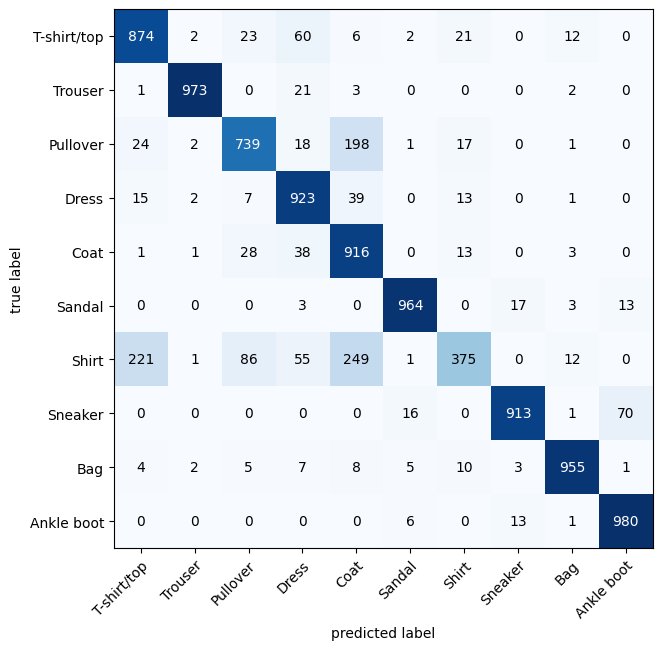

In [59]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(classes), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=classes, # turn the row and column labels into class names
    figsize=(10, 7)
);

## saving the model
model2


In [60]:
from pathlib import Path
model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True) # create the model directory if it doesn't
# save the model
torch.save(model1.state_dict(), model_path / "model1.pth")
# save the model architecture


In [61]:
loaded_model_2 = model1
MODEL_SAVE_PATH = model_path / "model1.pth"
# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

In [62]:
loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'model1',
 'model_loss': 0.38389748334884644,
 'model_acc': 86.15644904458598}

In [63]:
model_1_results

{'model_name': 'model1',
 'model_loss': 0.38389748334884644,
 'model_acc': 86.15644904458598}